In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [28]:
filename= "/home/renzo/Documents/RLE/Codigos/rle_127/solo12-pybullet/telemetria/fuerzas_Bezier_wedge.csv"
data = pd.read_csv(filename)
data[["FR"]] = data[["FR"]].abs()
data[["FL"]] = data[["FL"]].abs()
data[["BR"]] = data[["BR"]].abs()
data[["BL"]] = data[["BL"]].abs()
data.head(5)

,t,FR,FL,BR,BL,n_FR,n_FL,n_BR,n_BL
0,0.018128,0.232701,0.244861,0.232511,0.245056,15.603804,15.306208,3.041819,0.245056
1,0.033643,0.000000,0.000000,0.000000,0.000000,4.832694,4.210142,2.370450,0.000000
2,0.047264,0.016245,0.023881,0.017377,0.022759,1.460863,0.023881,10.777463,10.641973
3,0.062438,0.000000,0.000000,0.000000,0.000000,0.916002,0.000000,1.669197,1.328810
4,0.077134,0.157149,0.163241,0.160380,0.160023,0.491664,0.163241,5.423405,5.381148


In [29]:
def plot_data(data, axs, ix, iy, colx, coly, xlab, ylab, tit):
    axs[ix,iy].plot(data[[colx]], data[[coly]])
    axs[ix,iy].set_xlabel(xlab)
    axs[ix,iy].set_ylabel(ylab)
    axs[ix,iy].set_title(tit)

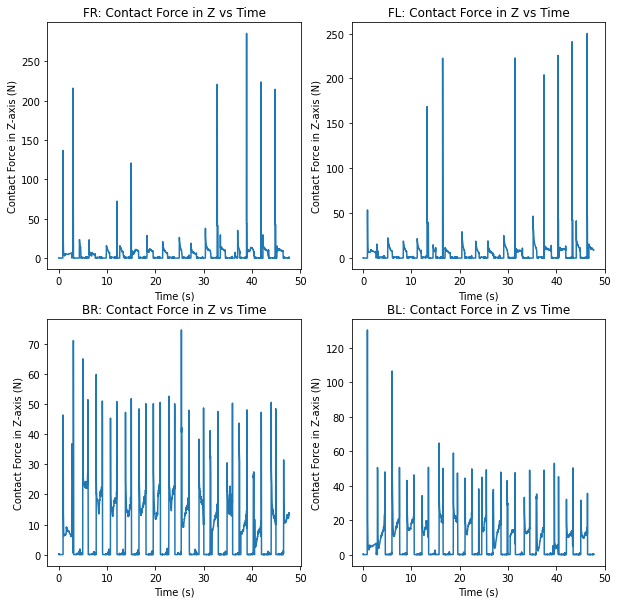

In [30]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))
# Fuerza en FR
plot_data(data, axs, 0, 0, "t", "FR", "Time (s)", "Contact Force in Z-axis (N)", "FR: Contact Force in Z vs Time")
# Fuerza en FL
plot_data(data, axs, 0, 1, "t", "FL", "Time (s)", "Contact Force in Z-axis (N)", "FL: Contact Force in Z vs Time")
# Fuerza en BR
plot_data(data, axs, 1, 0, "t", "BR", "Time (s)", "Contact Force in Z-axis (N)", "BR: Contact Force in Z vs Time")
# Fuerza en BL
plot_data(data, axs, 1, 1, "t", "BL", "Time (s)", "Contact Force in Z-axis (N)", "BL: Contact Force in Z vs Time")

plt.show()

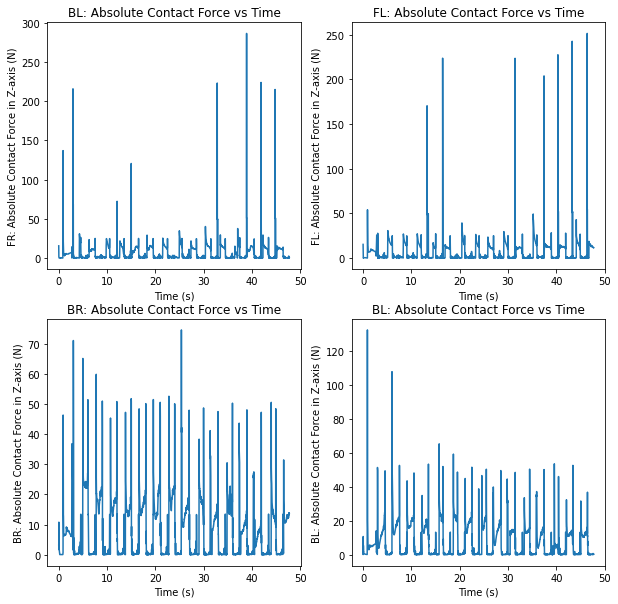

In [31]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))
# Fuerza en FR
plot_data(data, axs, 0, 0, "t", "n_FR", "Time (s)", "FR: Absolute Contact Force in Z-axis (N)", "BL: Absolute Contact Force vs Time")
# Fuerza en FL
plot_data(data, axs, 0, 1, "t", "n_FL", "Time (s)", "FL: Absolute Contact Force in Z-axis (N)", "FL: Absolute Contact Force vs Time")
# Fuerza en BR
plot_data(data, axs, 1, 0, "t", "n_BR", "Time (s)", "BR: Absolute Contact Force in Z-axis (N)", "BR: Absolute Contact Force vs Time")
# Fuerza en BL
plot_data(data, axs, 1, 1, "t", "n_BL", "Time (s)", "BL: Absolute Contact Force in Z-axis (N)", "BL: Absolute Contact Force vs Time")

plt.show()

In [32]:
def estadisticas_fuerza(data,col):
    stats = []
    stats.append(data[[col]][500::].mean()[0])
    stats.append(data[[col]][500::].max()[0])
    stats.append(data[[col]][500::].min()[0])
    print("media",col,":",stats[0])
    print("max:",col,":",stats[1])
    print("min:",col,":",stats[2])
    return stats


In [23]:
stats_FR = estadisticas_fuerza(data,"FR")
stats_FL = estadisticas_fuerza(data,"FL")
stats_BR = estadisticas_fuerza(data,"BR")
stats_BL = estadisticas_fuerza(data,"BL")


media FR : 4.6823139474067155
max: FR : 285.21855776718917
min: FR : 0.0
media FL : 5.065003401625395
max: FL : 250.10819726890125
min: FL : 0.0
media BR : 7.184713414191542
max: BR : 74.76015276490126
min: BR : 0.0
media BL : 6.274725658316108
max: BL : 64.77770071114263
min: BL : 0.0


In [33]:
data[["FR"]].min()[0]

0.0